In [10]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
# import ordered dict
from collections import OrderedDict

In [11]:
# input = "/work/mmalucch/out_hh4b/cutflow/out_MC_cutflow_DHH/output_GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"
input = "/home/matteo-malucchi/software/output_GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE_cutflow.coffea"

o = load(f"{input}")

In [12]:
print(o["cutflow"])
for k in o["cutflow"].keys():
    print(k)
    for kk in o["cutflow"][k].keys():
        print(f"\t{kk} {o['cutflow'][k][kk]}")
dataset=list(o["cutflow"]["initial"].keys())[0]
print(f"Dataset: {dataset}")
sample="GluGlutoHHto4B"

num_events_dict=OrderedDict()
for k in o["cutflow"].keys():
    for kk in o["cutflow"][k].keys():
        if k == "initial":
            num_events_initial= o["cutflow"][k][kk]
        if type(o["cutflow"][k][kk])==int:
            continue
        new_value= o["cutflow"][k][kk][sample]
        print(k)
        print(f"\t{new_value}")
        num_events_dict[k]=new_value

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': 7391383}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': 7391383}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': 4435504}, 'four_jets_presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 4435504}}, 'MET_filter': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 4433363}}, 'Lepton_veto': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 4351942}}, 'Jet_Veto_map': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 3894567}}, 'HLT_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 2368299}}, 'jet_pT_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 1996547}}, '2b_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_2022_postEE': {'GluGlutoHHto4B': 1933825}}, 'third_btag_selection': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p

In [13]:
def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        # transform to percentage
        percentage = height * 100
        
        ax.annotate(f'{percentage:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
        
        
def plot_efficiencies(list_cuts, efficiencies, efficiencies_names, title):
    # plot the efficiencies
    cut_names=list_cuts
    x = np.arange(len(cut_names))
    eff_vals = [e[0] for e in efficiencies]
    total_eff_vals = [e[1] for e in efficiencies]
    fig, ax = plt.subplots(figsize=(19, 13))
    #plot the 3 bars
    width = 0.25
    bars1 = ax.bar(x - width, eff_vals, width, label=efficiencies_names[0])
    bars2 = ax.bar(x, total_eff_vals, width, label=efficiencies_names[1])
    # print also the values on top of the bars
    autolabel(ax, bars1)
    autolabel(ax, bars2)
    
    # check if need to plot also efficiency wrt to initial events
    if len(efficiencies[0])==3:
        total_eff_from_initial_vals = [e[2] for e in efficiencies]
        bars3 = ax.bar(x+width, total_eff_from_initial_vals, width, label=efficiencies_names[2])
        autolabel(ax, bars3)

    ax.set_ylabel('Efficiency %')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(cut_names, rotation=45, ha='right')
    ax.legend(fontsize='small')
    ax.set_ylim(0, 1.2)
    hep.style.use(hep.style.CMS)
    hep.cms.lumitext("(13.6 TeV)", ax=ax)
    hep.cms.text("Preliminary", ax=ax)
    plt.tight_layout()
    plt.show()

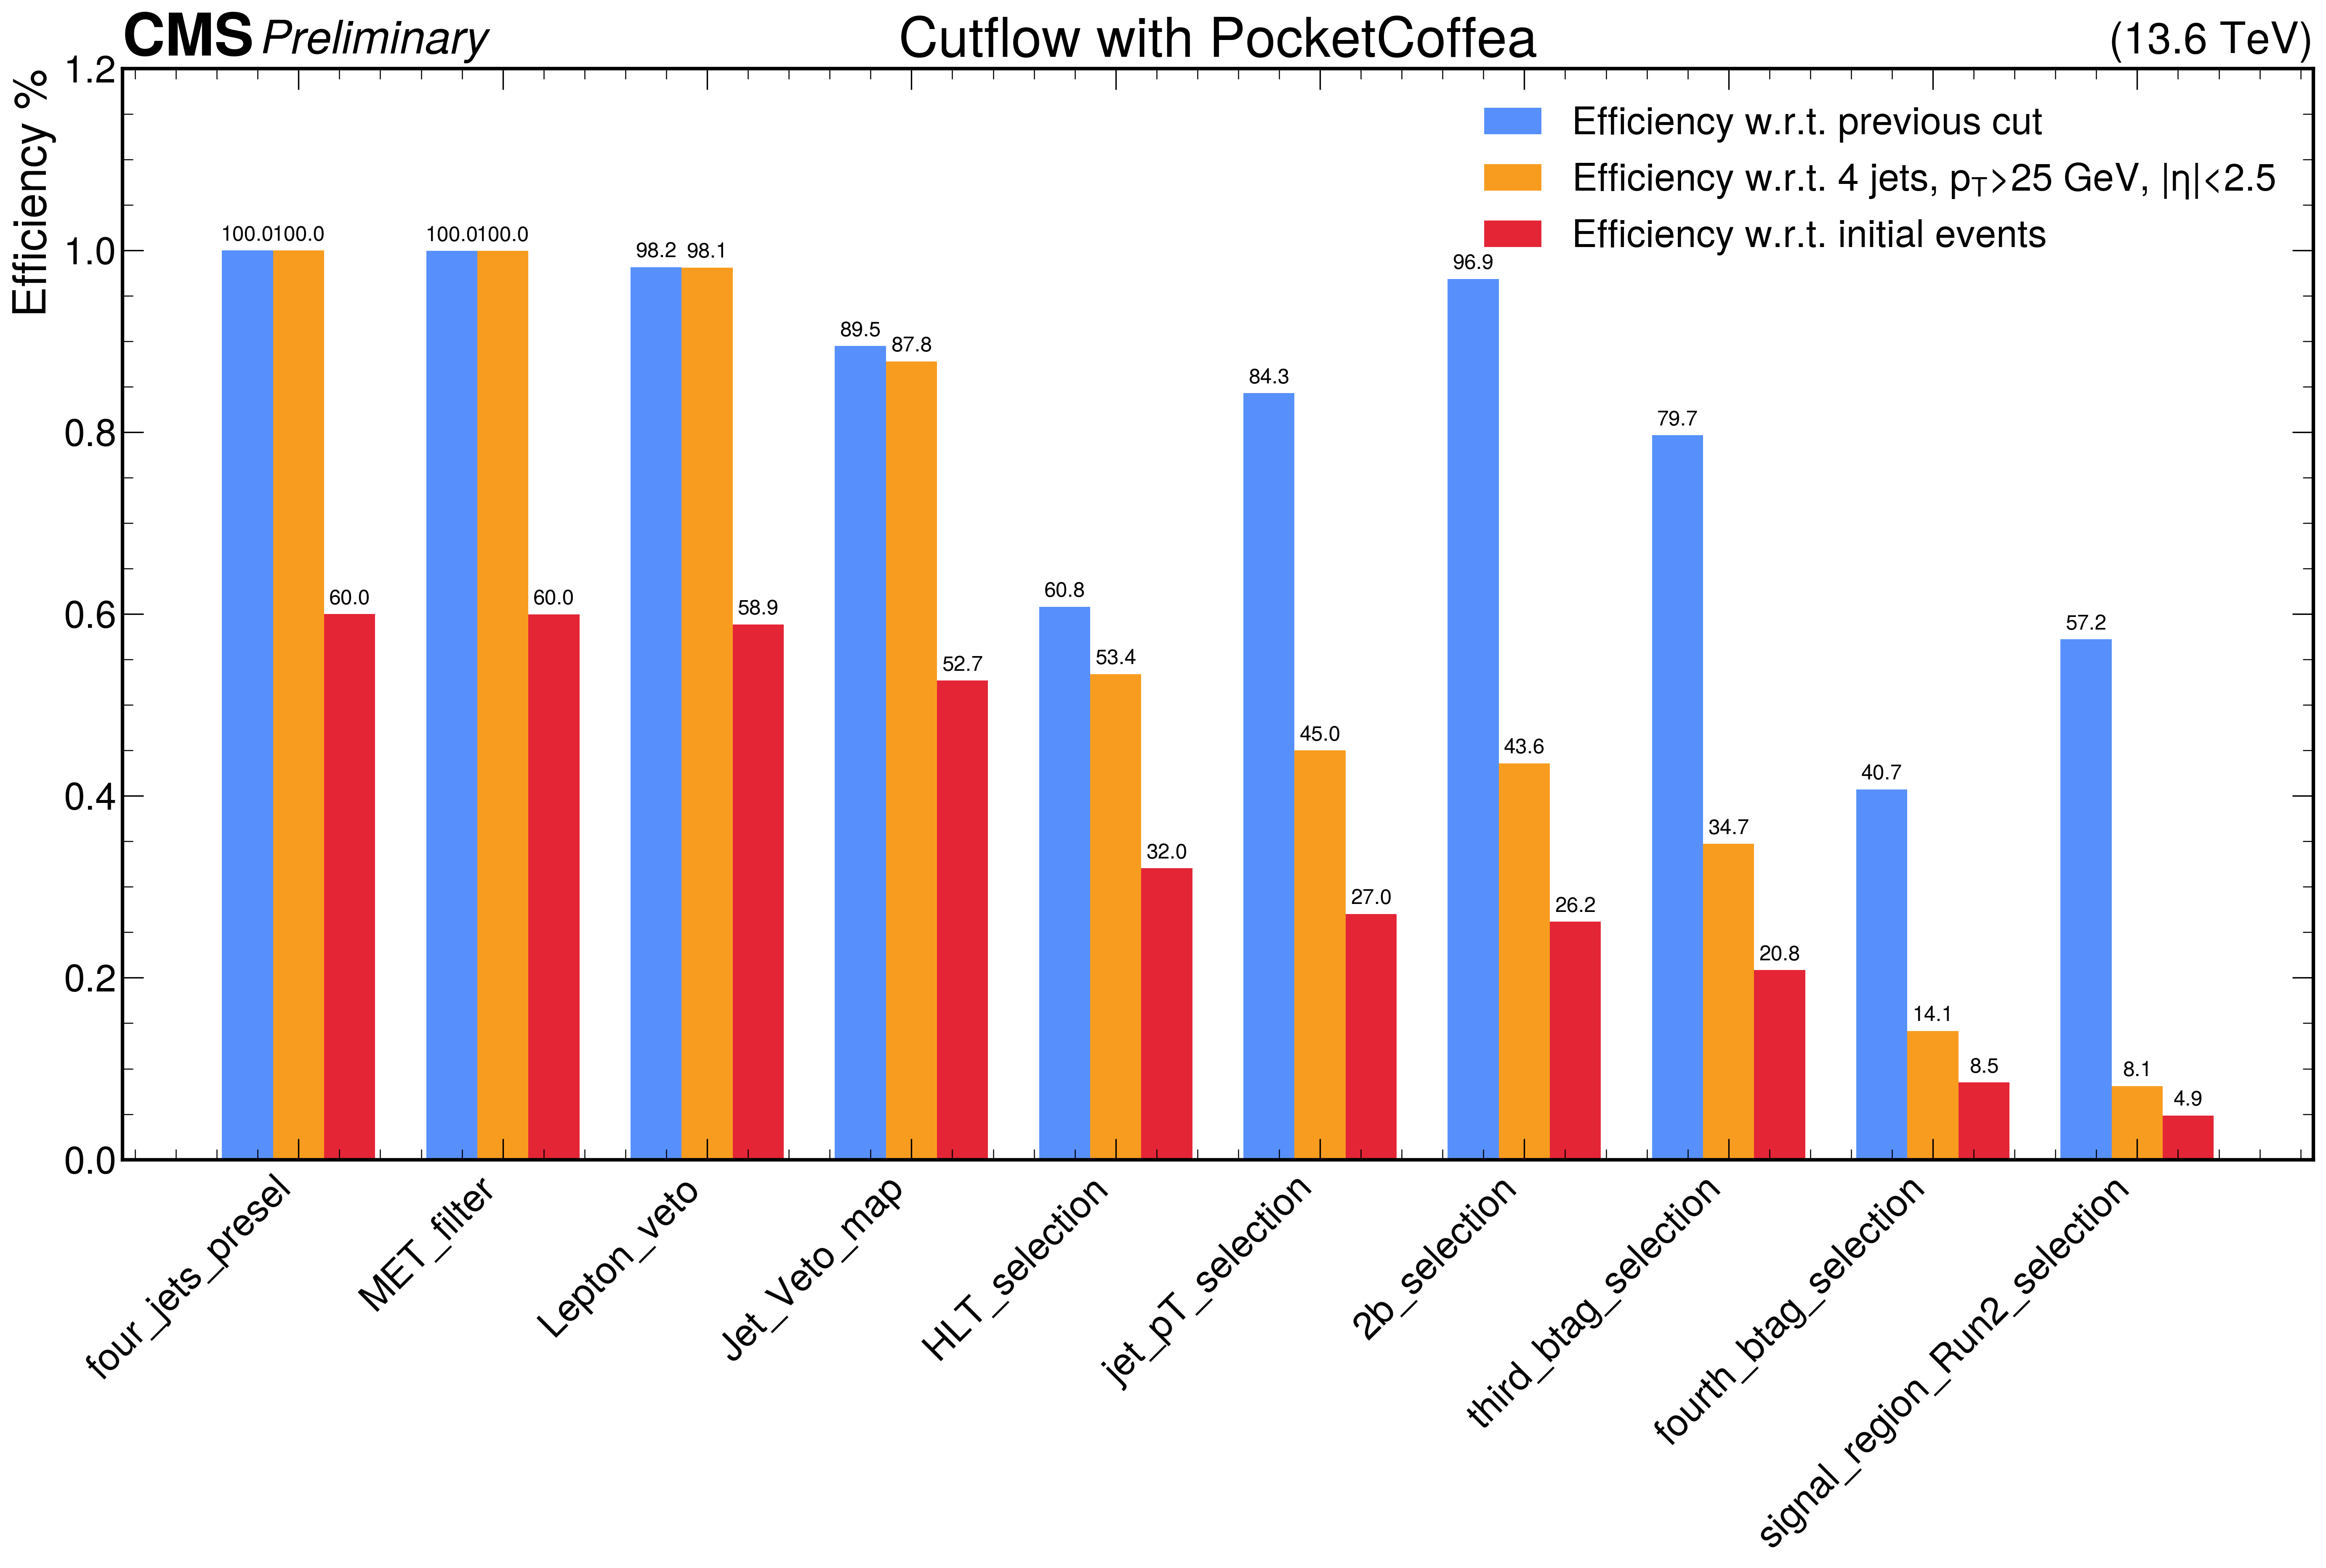

In [14]:
# compute the efficiencies of each cut respect to the previous one and also to the initial number of events
efficiencies=[]
list_cuts=list(num_events_dict.keys())
num_events_presel=num_events_dict[list_cuts[0]]
relative_efficiencies=[]
cumulative_efficiencies=[]
for name, num_events in num_events_dict.items():
    prev_cut_name=list_cuts[list_cuts.index(name)-1]
    prev_cut_events=num_events_dict[prev_cut_name]
    if name== list_cuts[0]:
        total_eff=1
        total_eff_from_initial= num_events/num_events_initial
        eff=1
    else:
        total_eff= num_events/num_events_presel if num_events_presel>0 else 0
        total_eff_from_initial=num_events/num_events_initial
        eff= num_events/prev_cut_events if prev_cut_events>0 else 0
    
    relative_efficiencies.append(eff)
    cumulative_efficiencies.append(total_eff)
    efficiencies.append( (eff, total_eff, total_eff_from_initial) )
efficiencies_names=['Efficiency w.r.t. previous cut', r'Efficiency w.r.t. 4 jets, $p_{\mathrm{T}}$>25 GeV, |$\eta$|<2.5', 'Efficiency w.r.t. initial events']
plot_efficiencies(list_cuts,efficiencies, efficiencies_names,"Cutflow with PocketCoffea")
    

# Cutflow efficiencies taken from AN-23-284

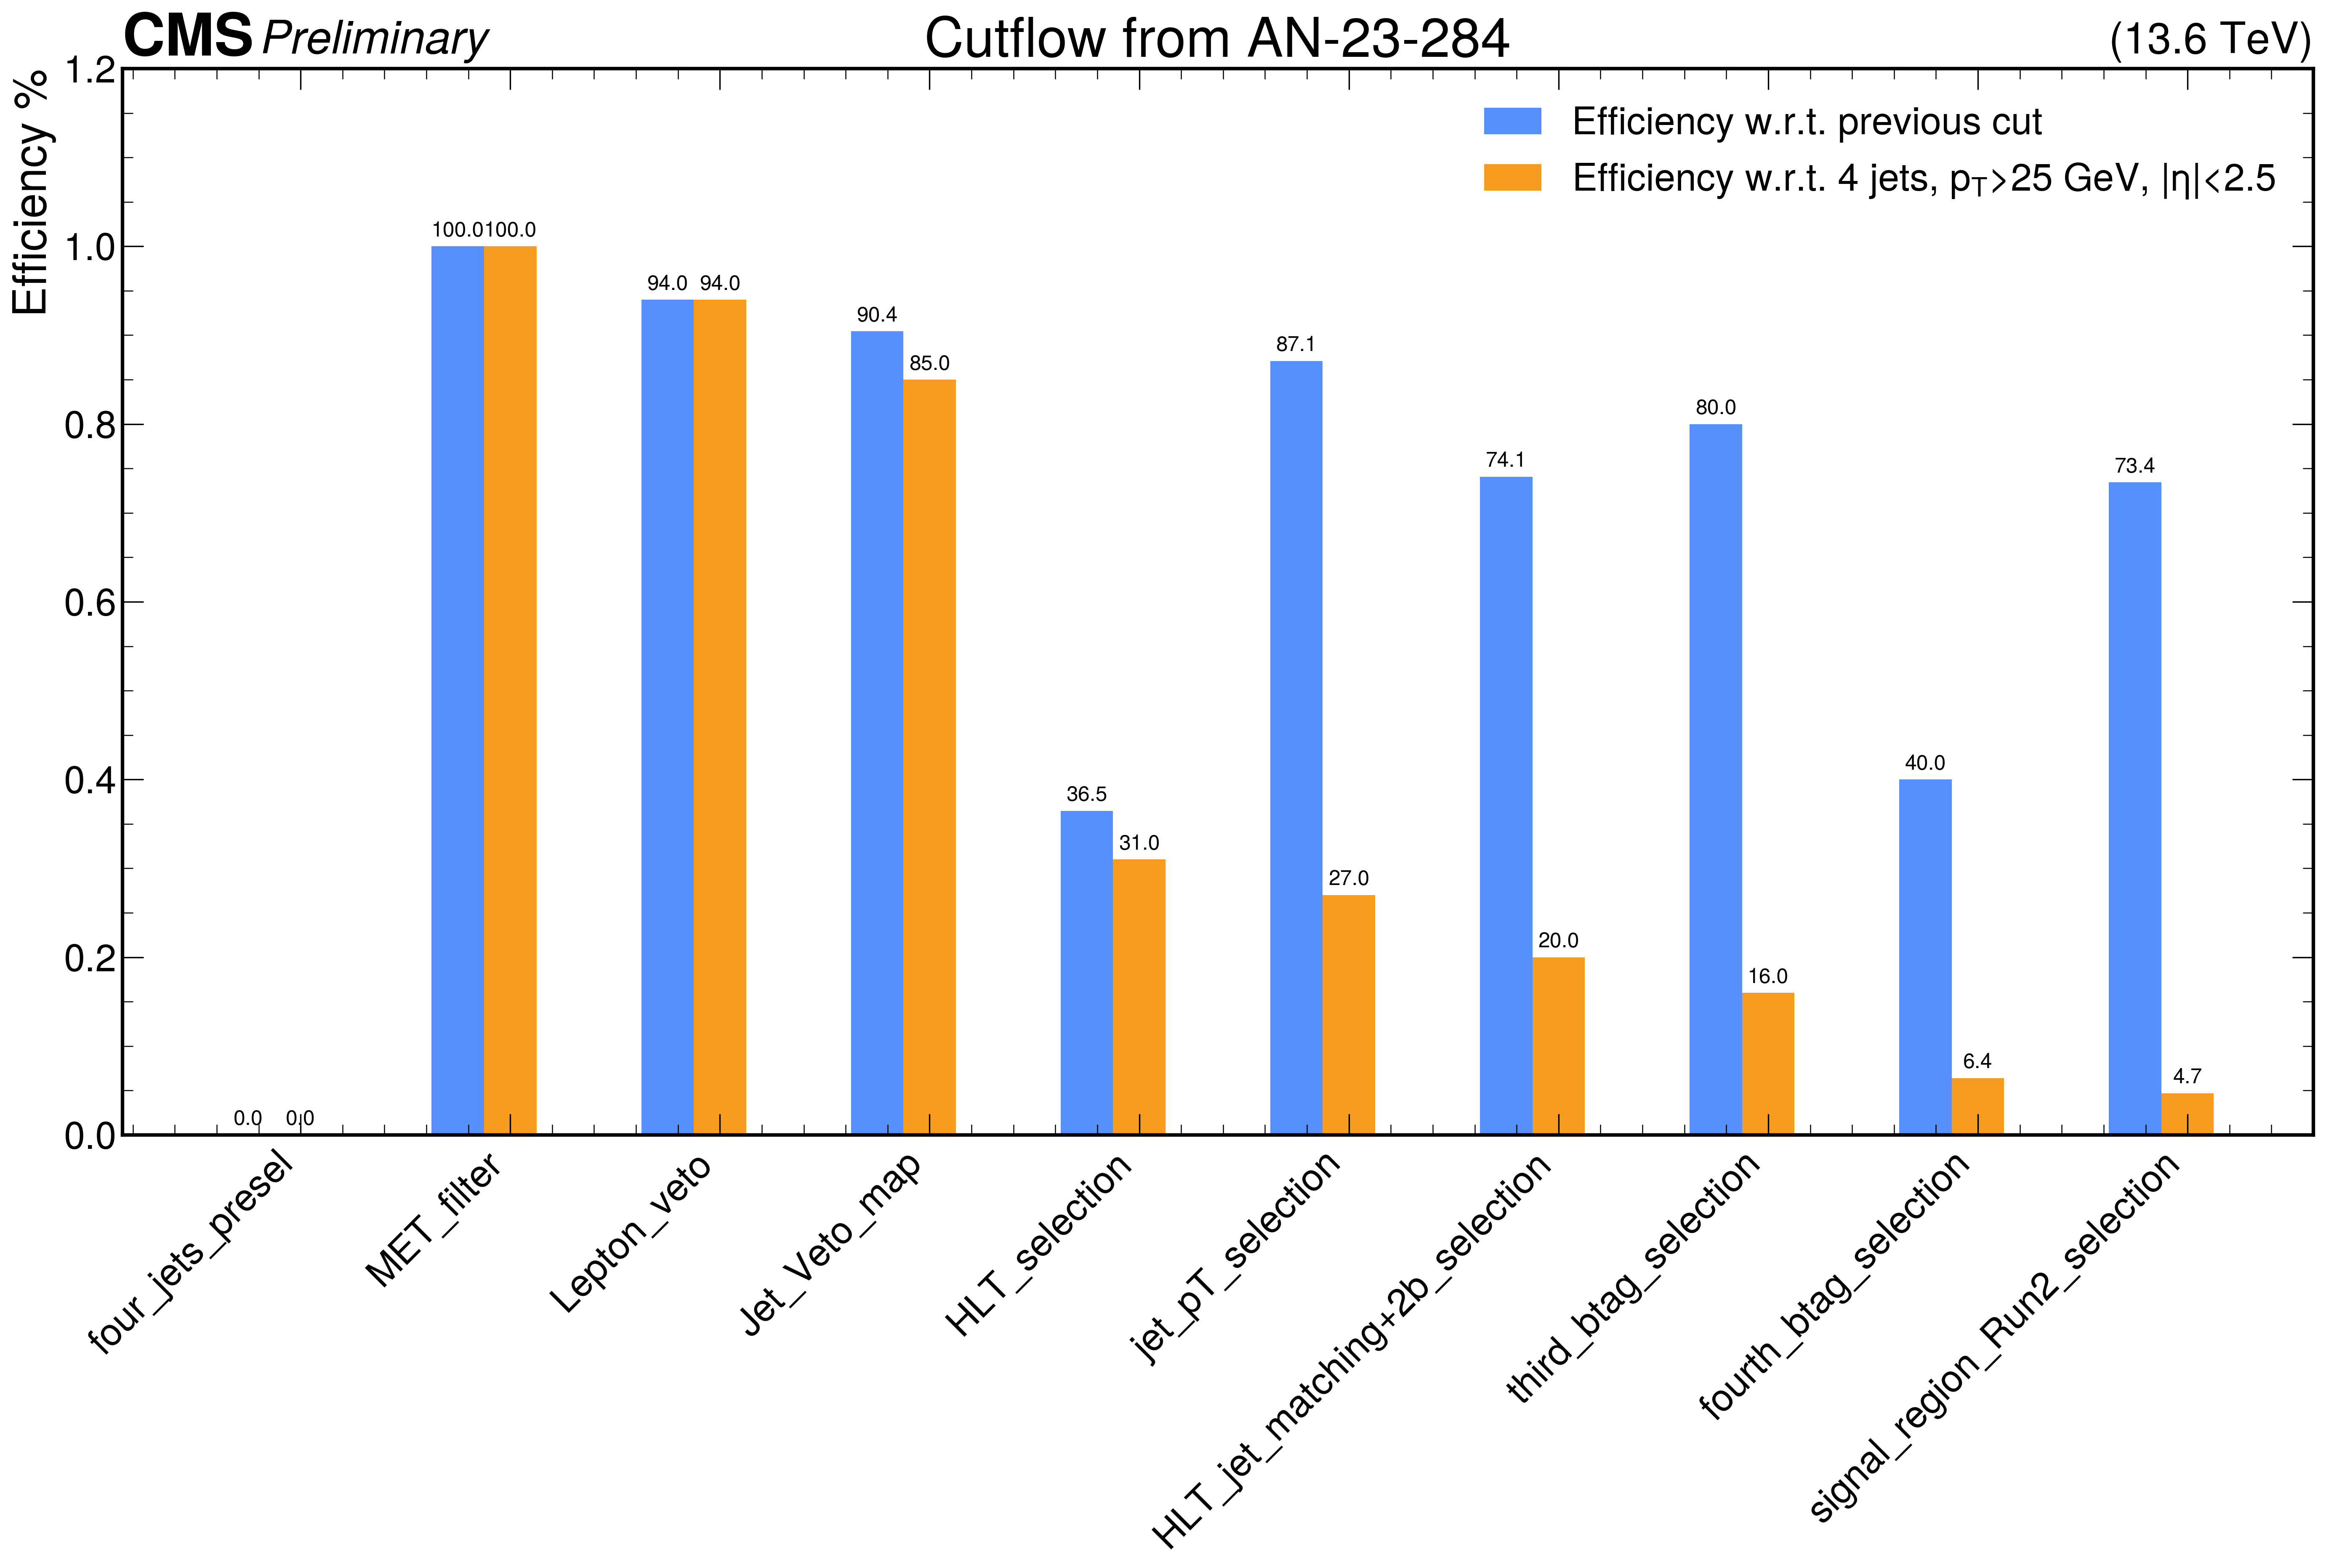

In [15]:
cumulative_eff_AN=[
    0, 100,94, 85, 31, 27, 20, 16, 6.4, 4.7
]
cumulative_eff_AN=[x/100 for x in cumulative_eff_AN]
list_cuts_AN=list(num_events_dict.keys())
# replace element in list
list_cuts_AN[list_cuts_AN.index("2b_selection")]="HLT_jet_matching+2b_selection"

# compute the relative efficiency wrt to last cut
relative_eff_AN=[]
for i in range(len(cumulative_eff_AN)):
    if i==0:
        relative_eff_AN.append(0)
        continue
    if cumulative_eff_AN[i-1] !=0:
        rel_eff=cumulative_eff_AN[i]/cumulative_eff_AN[i-1] 
    else :
        rel_eff=cumulative_eff_AN[i]/1
    relative_eff_AN.append(rel_eff)
    
efficiencies_AN=[(relative_eff_AN[i], cumulative_eff_AN[i]) for i in range(len(cumulative_eff_AN))]
efficiencies_names_AN=['Efficiency w.r.t. previous cut', r'Efficiency w.r.t. 4 jets, $p_{\mathrm{T}}$>25 GeV, |$\eta$|<2.5']

plot_efficiencies(list_cuts_AN,efficiencies_AN,efficiencies_names_AN, "Cutflow from AN-23-284")


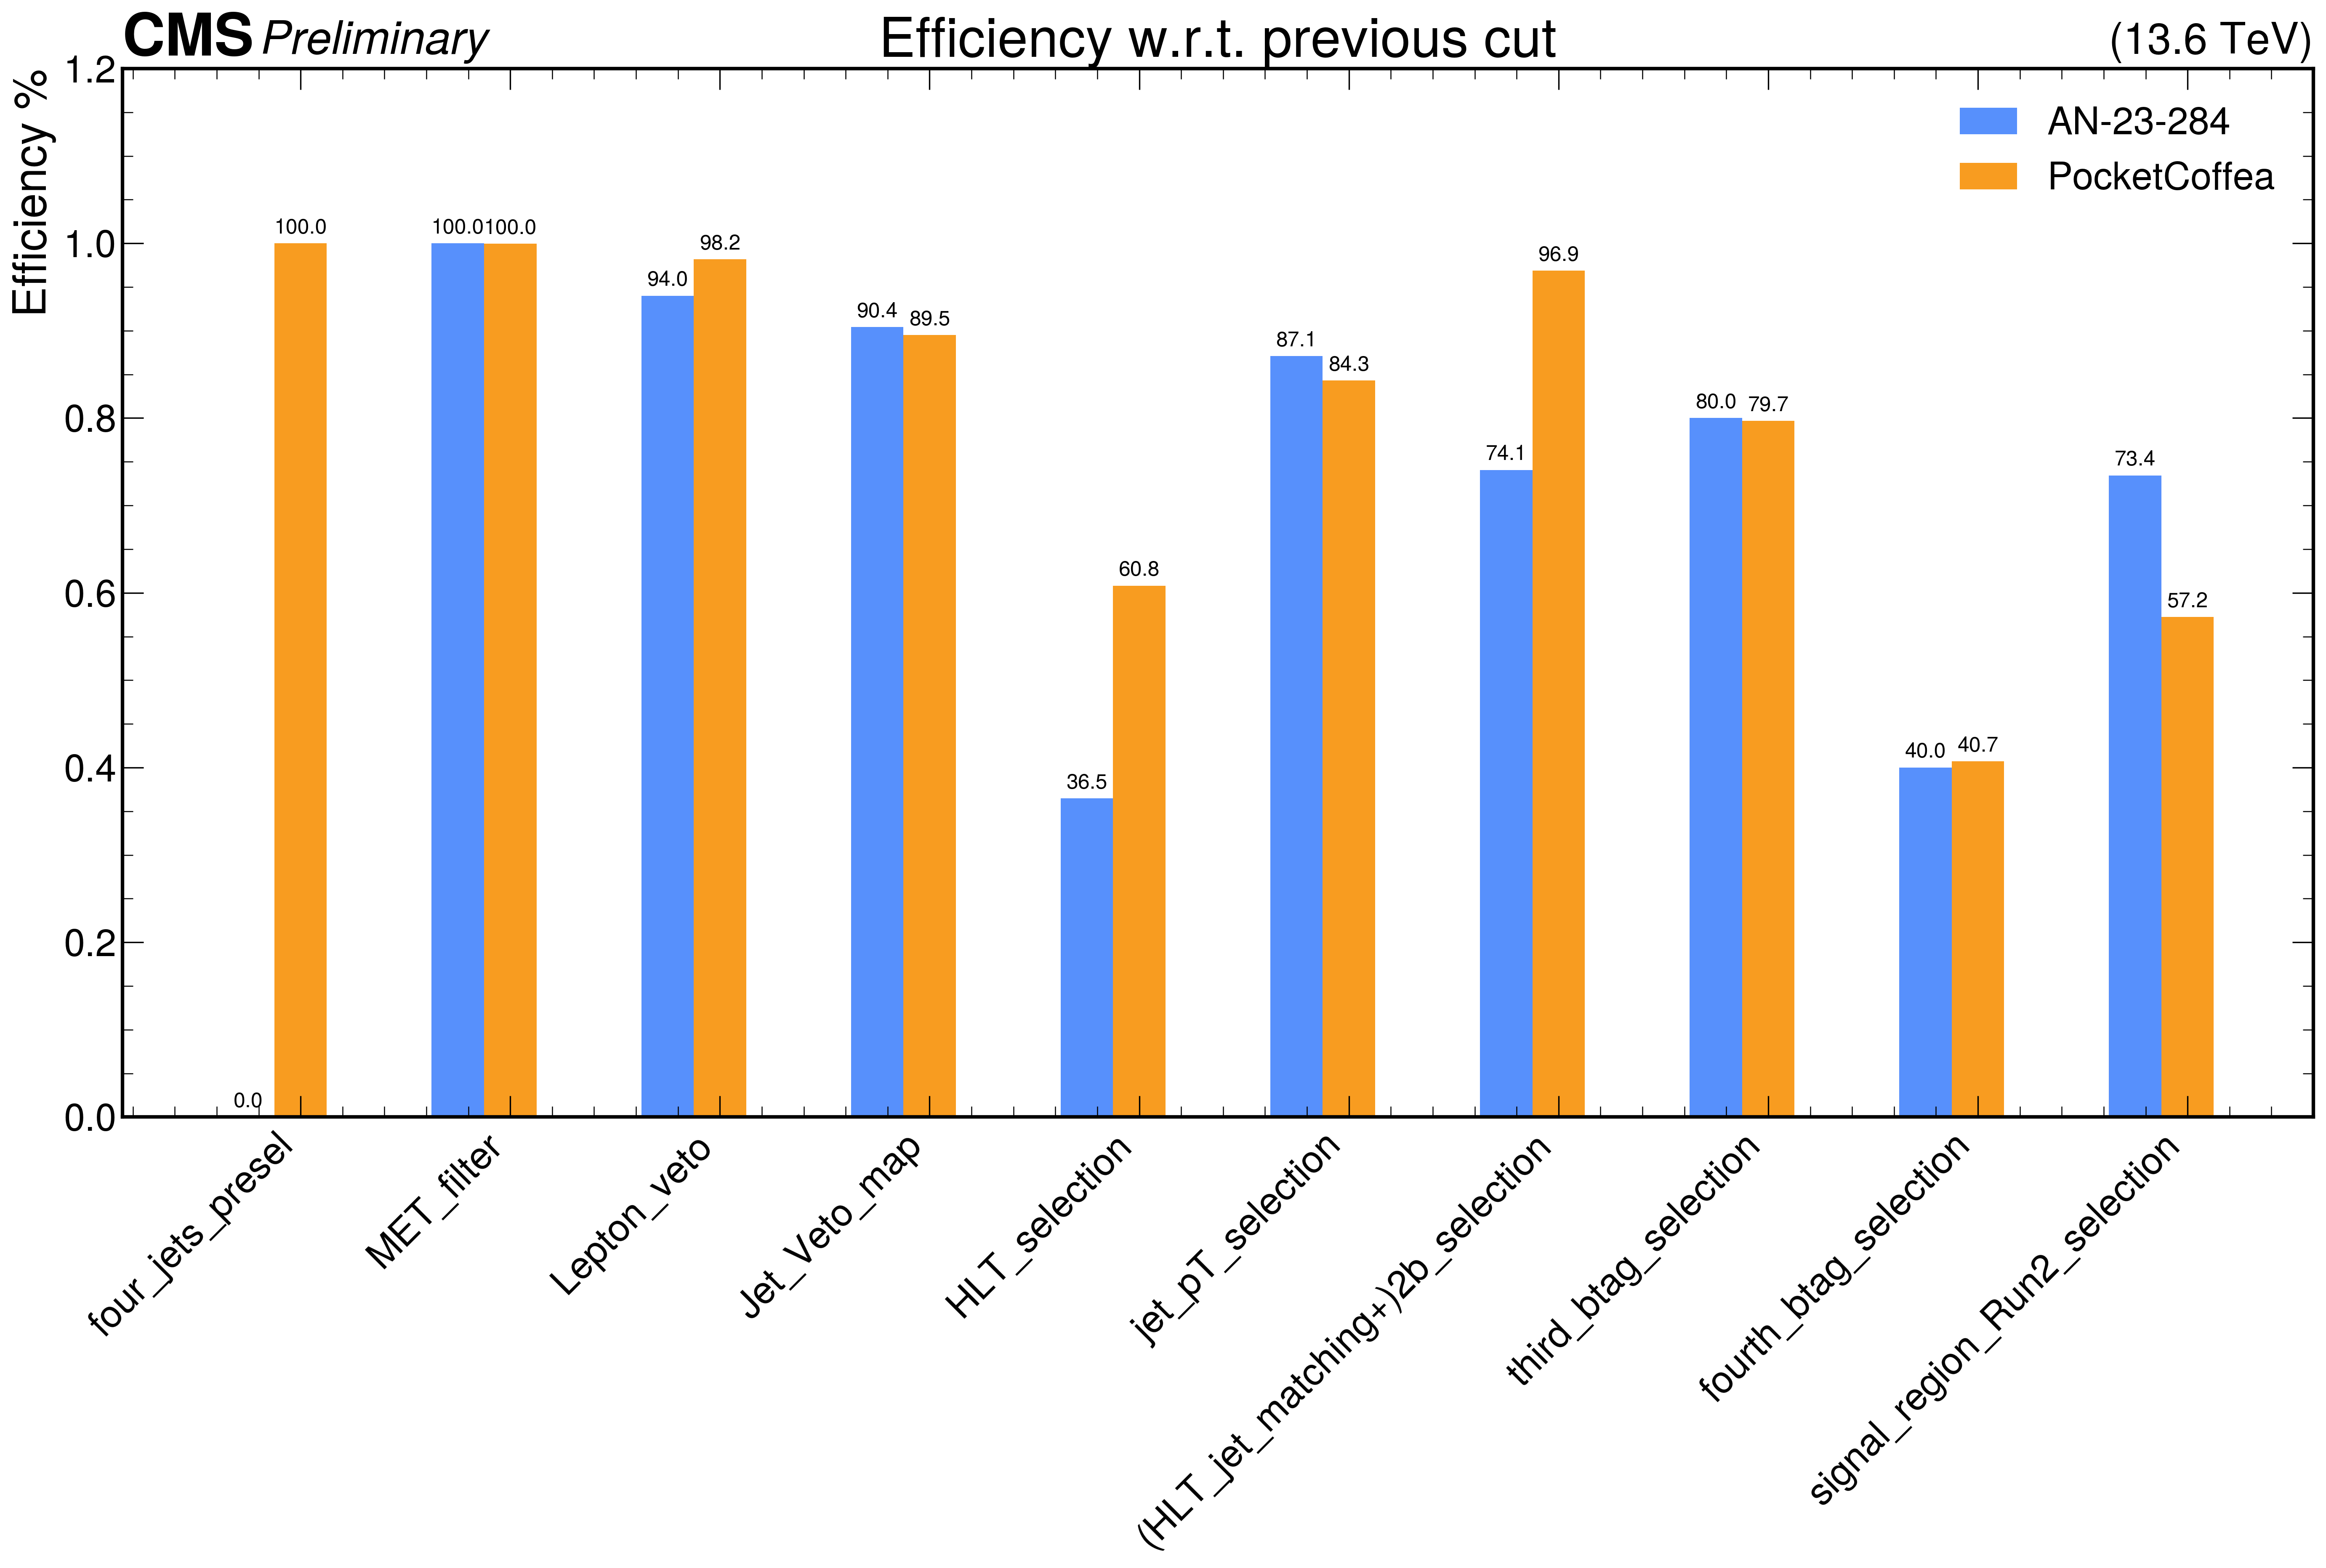

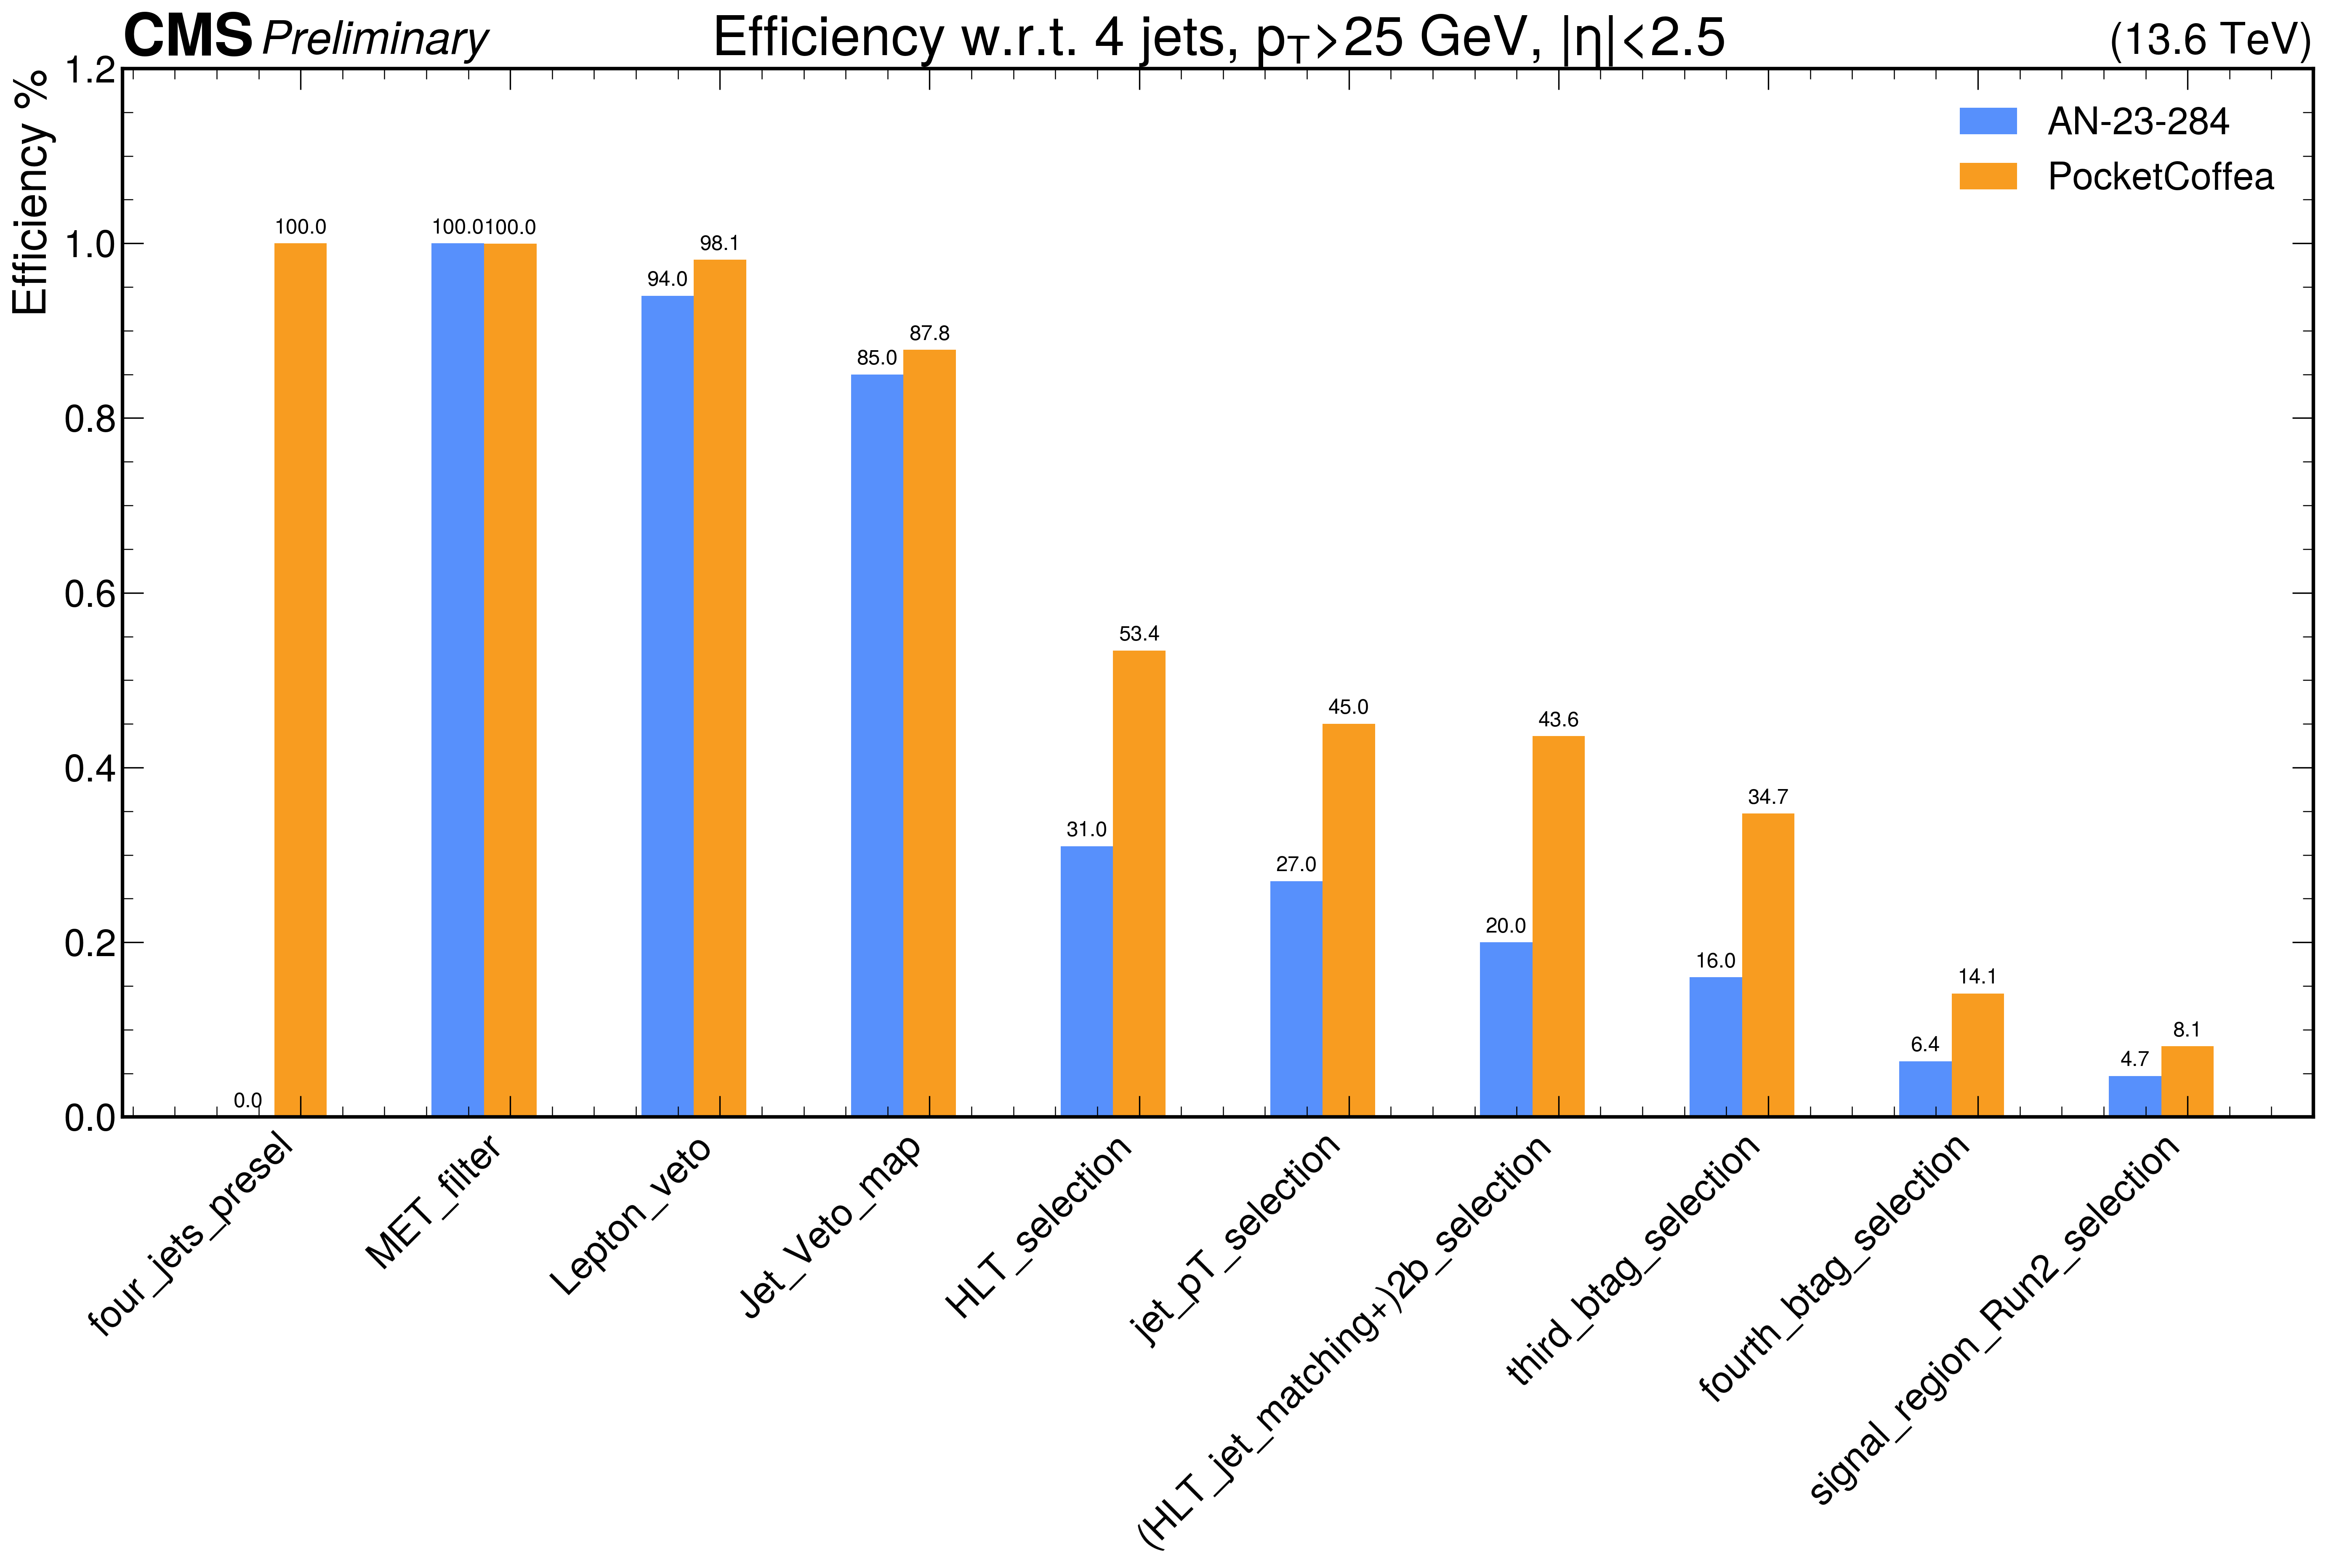

In [17]:
efficiencies_rel=[(relative_eff_AN[i], relative_efficiencies[i]) for i in range(len(relative_efficiencies))]
efficiencies_names_comparison=['AN-23-284', 'PocketCoffea']
list_cuts_comp=list_cuts.copy()
list_cuts_comp[list_cuts_comp.index("2b_selection")]="(HLT_jet_matching+)2b_selection"

plot_efficiencies(list_cuts_comp,efficiencies_rel,efficiencies_names_comparison, "Efficiency w.r.t. previous cut")


efficiencies_cum=[(cumulative_eff_AN[i], cumulative_efficiencies[i]) for i in range(len(cumulative_efficiencies))]
plot_efficiencies(list_cuts_comp,efficiencies_cum,efficiencies_names_comparison, r'Efficiency w.r.t. 4 jets, $p_{\mathrm{T}}$>25 GeV, |$\eta$|<2.5')

